Load Iris Data

In [1]:
load fisheriris % Load Fisher's Iris data
X = [meas(:,3),meas(:,2)]; % Set X to include third and second column

Plot Data by Categories

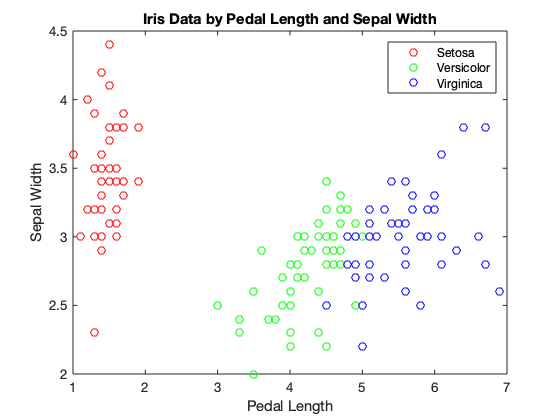

In [2]:
x_setosa = X(find(getY(species,'setosa')+1),:);
x_versicolor = X(find(getY(species,'versicolor')+1),:);
x_virginica = X(find(getY(species,'virginica')+1),:);
plot(x_setosa(:,1),x_setosa(:,2),"ro"); hold on;
plot(x_versicolor(:,1),x_versicolor(:,2),"go"); hold on;
plot(x_virginica(:,1),x_virginica(:,2),"bo");
legend('Setosa','Versicolor','Virginica')
xlabel('Pedal Length')
ylabel('Sepal Width')
title('Iris Data by Pedal Length and Sepal Width')

Set All Paramters

In [3]:
% Global Parameters
classes = {'setosa','versicolor','virginica'}; % List of all classes
y_numeric = [repelem(1,50),repelem(2,50),repelem(3,50)]; % Numeric values of 3 classes
maxIter = 400; % Set maximum iterations for all methods

% Cubic Parameters
kphi_cubic = @(x) [x,x.^2,x.^3]; % Set phi function of kernel
K_cubic = @(x1,x2) dot(kphi_cubic(x1),kphi_cubic(x2)); % Set kernel function based on phi
C_cubic = .01; % Set C less restrictive for cubic

% RBF Parameters
sigma = 1; % Sigma for RBF kernel
K_RBF = @(x1,x2) exp(-norm(x1-x2)^2 / (2*sigma^2)); % RBF Kernel function
C_RBF = .2; % Set C more restrictive for RBF

% Quadratic Penalty Parameters
tolQP = 1e-8; % Global tolerance for quadratic penalty
tQP = 1e-12; % Tolerance for each step of quadratic penalty
tMult = .5; % Decrease factor of tQP
mu = 1; % Initial mu for quadratic penalty
muMult = 1.1; % Multiplier of mu for each iteration of quadratic penalty

% SMO Paramters
tolSMO = 1e-3; % Tolerance for SMO
max_passes = 5; % Maximum passes for SMO

Visualise Results and Accuracy for Quadratric Penalty with Cubic Kernel

Accuracy: 95.3333%


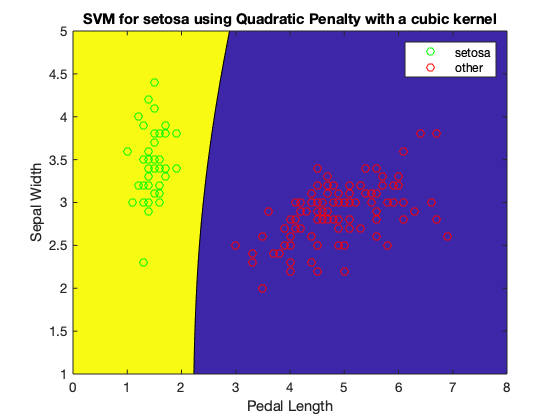

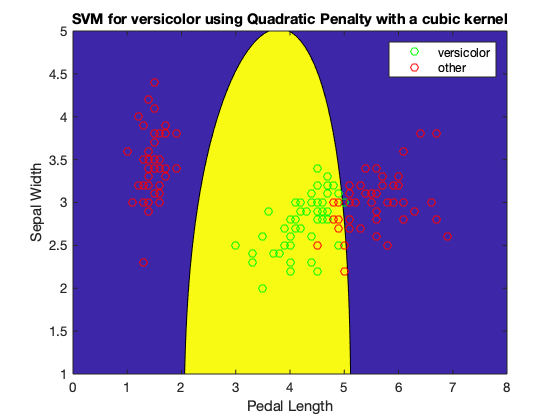

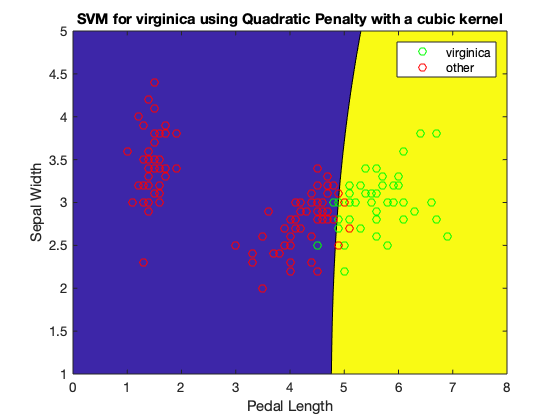

In [4]:
cubic_QP_vals = zeros(length(X),length(classes));
cubic_QP_times = zeros(length(classes),1);

for i = 1:length(classes)
    tic;
    [alpha,b,info] = svmQP(X,species,char(classes(i)),K_cubic,C_cubic,mu,muMult,tQP,tMult,tolQP,maxIter,0);
    cubic_QP_times(i) = toc;
    figure(i);
    plotClass(X,species,classes(i),alpha,b,K_cubic);
    title(['SVM for ',char(classes(i)),' using Quadratic Penalty with a cubic kernel'])
    y = getY(species,char(classes(i)));
    for j = 1:length(y)
        cubic_QP_vals(j,i) = value(X,y,alpha,K_cubic,b,X(j,:));
    end
end

[i,classification] = max(cubic_QP_vals');
cubic_QP_acc = 100*sum(classification == y_numeric) / length(y_numeric);
disp(['Accuracy: ',num2str(cubic_QP_acc),'%']);

Visualise Results and Accuracy for Quadratric Penalty with RBF Kernel

Accuracy: 95.3333%


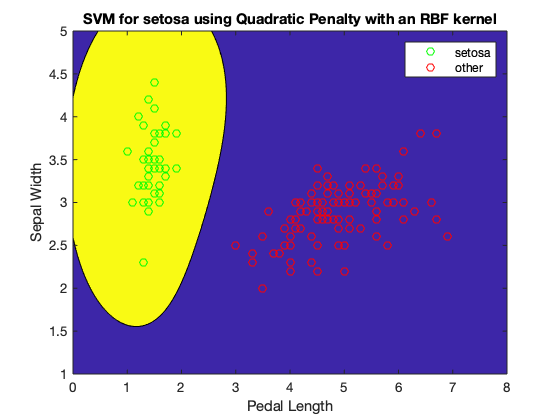

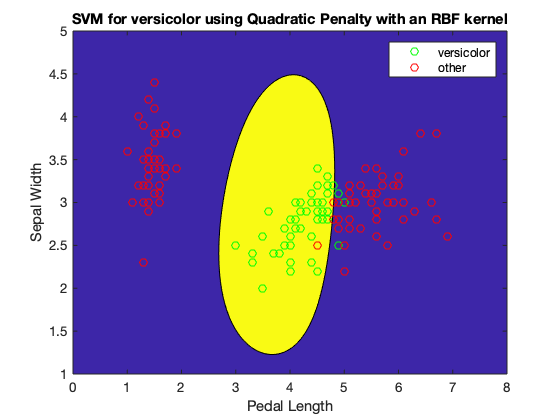

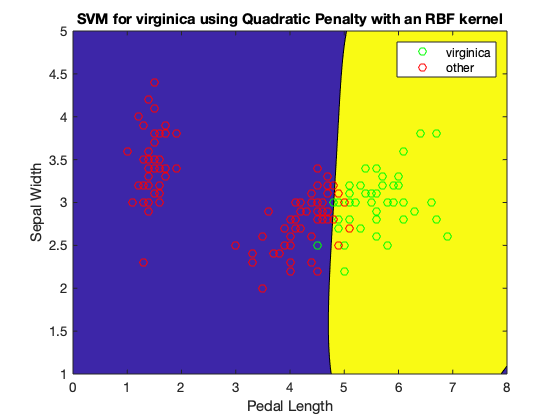

In [5]:
RBF_QP_vals = zeros(length(X),length(classes));
RBF_QP_times = zeros(length(classes),1);

for i = 1:length(classes)
    tic;
    [alpha,b,info] = svmQP(X,species,char(classes(i)),K_RBF,C_RBF,mu,muMult,tQP,tMult,tolQP,maxIter,0);
    RBF_QP_times(i) = toc;
    figure(i);
    plotClass(X,species,classes(i),alpha,b,K_RBF);
    title(['SVM for ',char(classes(i)),' using Quadratic Penalty with an RBF kernel'])
    y = getY(species,char(classes(i)));
    for j = 1:length(y)
        RBF_QP_vals(j,i) = value(X,y,alpha,K_RBF,b,X(j,:));
    end
end

[i,classification] = max(RBF_QP_vals');
RBF_QP_acc = 100*sum(classification == y_numeric) / length(y_numeric);
disp(['Accuracy: ',num2str(RBF_QP_acc),'%']);

Visualise Results and Accuracy for SMO with Cubic Kernel

Accuracy: 94.6667%


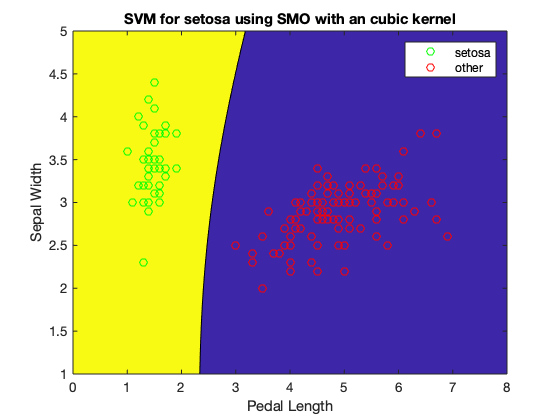

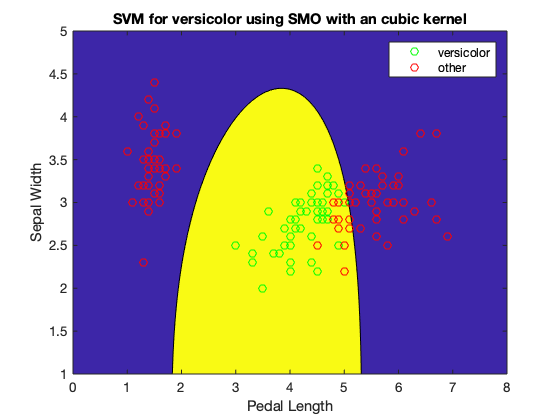

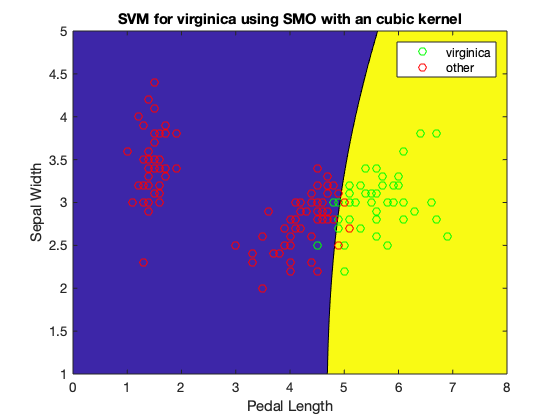

In [6]:
cubic_SMO_vals = zeros(length(X),length(classes));
cubic_SMO_times = zeros(length(classes),1);

for i = 1:length(classes)
    tic;
    [alpha,b,info] = SMO(X,species,char(classes(i)),K_cubic,C_cubic,tolSMO,max_passes,maxIter,0);
    cubic_SMO_times(i) = toc;
    figure(i);
    plotClass(X,species,classes(i),alpha,b,K_cubic);
    title(['SVM for ',char(classes(i)),' using SMO with an cubic kernel'])
    y = getY(species,char(classes(i)));
    for j = 1:length(y)
        cubic_SMO_vals(j,i) = value(X,y,alpha,K_cubic,b,X(j,:));
    end
end

[i,classification] = max(cubic_SMO_vals');
cubic_SMO_acc = 100*sum(classification == y_numeric) / length(y_numeric);
disp(['Accuracy: ',num2str(cubic_SMO_acc),'%']);

Visualise Results and Accuracy for SMO with RBF Kernel

Accuracy: 94.6667%


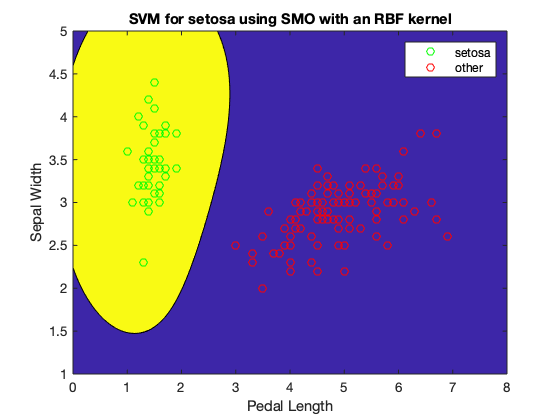

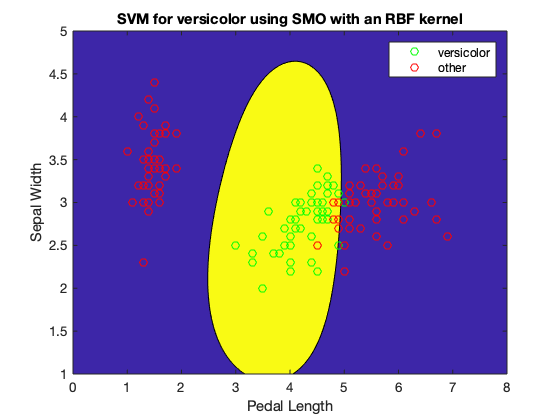

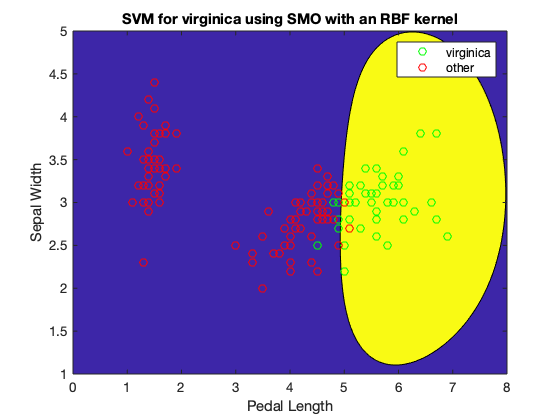

In [7]:
RBF_SMO_vals = zeros(length(X),length(classes));
RBF_SMO_times = zeros(length(classes),1);

for i = 1:length(classes)
    tic;
    [alpha,b,info] = SMO(X,species,char(classes(i)),K_RBF,C_RBF,tolSMO,max_passes,maxIter,0);
    RBF_SMO_times(i) = toc;
    figure(i);
    plotClass(X,species,classes(i),alpha,b,K_RBF);
    title(['SVM for ',char(classes(i)),' using SMO with an RBF kernel'])
    y = getY(species,char(classes(i)));
    for j = 1:length(y)
        RBF_SMO_vals(j,i) = value(X,y,alpha,K_RBF,b,X(j,:));
    end

end

[i,classification] = max(RBF_SMO_vals');
RBF_SMO_acc = 100*sum(classification == y_numeric) / length(y_numeric);
disp(['Accuracy: ',num2str(RBF_SMO_acc),'%']);

Plot accuracy of all 4 permutations

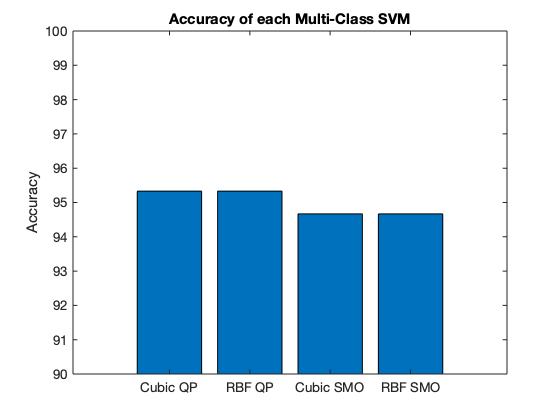

In [8]:
bar([cubic_QP_acc,RBF_QP_acc,cubic_SMO_acc,RBF_SMO_acc]);
ylim([90 100])
set(gca,'xticklabel',{"Cubic QP";"RBF QP";"Cubic SMO";"RBF SMO"})
ylabel("Accuracy")
title("Accuracy of each Multi-Class SVM")

CPU time of all methods

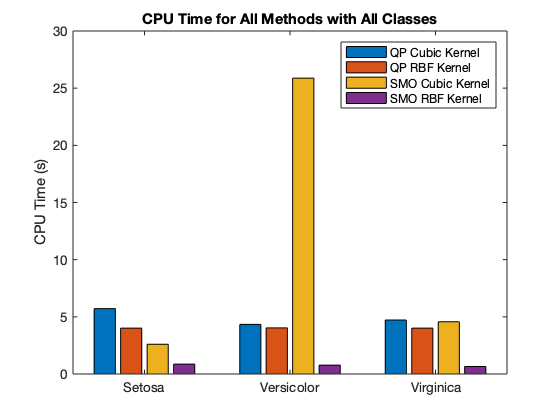

In [9]:
data = [cubic_QP_times  RBF_QP_times  cubic_SMO_times RBF_SMO_times];

hb = bar(data);
set(gca,'xticklabel',{"Setosa";"Versicolor";"Virginica"})
legend(["QP Cubic Kernel";"QP RBF Kernel";"SMO Cubic Kernel";"SMO RBF Kernel"]);
ylabel("CPU Time (s)")
title("CPU Time for All Methods with All Classes")


Convergence of Quadratic Penalty with Cubic Kernel

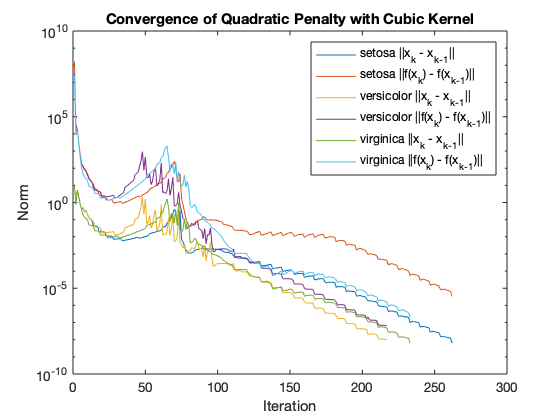

In [10]:
cubic_QP_info = [];
for i = 1:length(classes)
    [alpha,b,info] = svmQP(X,species,char(classes(i)),K_cubic,C_cubic,mu,muMult,tQP,tMult,tolQP,maxIter,1);
    cubic_QP_info = [cubic_QP_info info];
end
for i = 1:length(classes)
    semilogy(cubic_QP_info(i).xnorms); hold on;
    semilogy(cubic_QP_info(i).fnorms); hold on;
end
legend_str = ["setosa ||x_k - x_{k-1}||";"setosa ||f(x_k) - f(x_{k-1})||";
              "versicolor ||x_k - x_{k-1}||";"versicolor ||f(x_k) - f(x_{k-1})||";
              "virginica ||x_k - x_{k-1}||";"virginica ||f(x_k) - f(x_{k-1})||"];
legend(legend_str,'Location','northeast')
xlabel('Iteration')
ylabel('Norm')
title('Convergence of Quadratic Penalty with Cubic Kernel')

Convergence of Quadratic Penalty with RBF Kernel

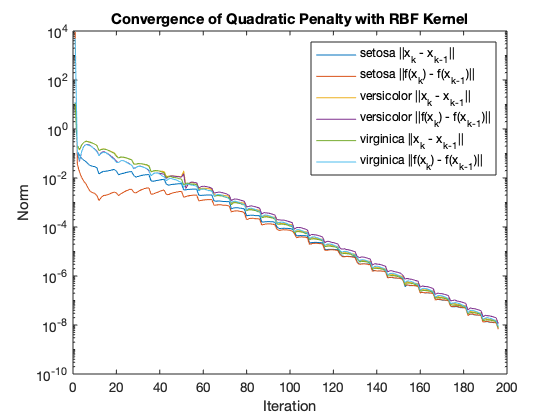

In [11]:
RBF_QP_info = [];
for i = 1:length(classes)
    [alpha,b,info] = svmQP(X,species,char(classes(i)),K_RBF,C_RBF,mu,muMult,tQP,tMult,tolQP,maxIter,1);
    RBF_QP_info = [RBF_QP_info info];
end
for i = 1:length(classes)
    semilogy(RBF_QP_info(i).xnorms); hold on;
    semilogy(RBF_QP_info(i).fnorms); hold on;
end
legend_str = ["setosa ||x_k - x_{k-1}||";"setosa ||f(x_k) - f(x_{k-1})||";
              "versicolor ||x_k - x_{k-1}||";"versicolor ||f(x_k) - f(x_{k-1})||";
              "virginica ||x_k - x_{k-1}||";"virginica ||f(x_k) - f(x_{k-1})||"];
legend(legend_str,'Location','northeast')
xlabel('Iteration')
ylabel('Norm')
title('Convergence of Quadratic Penalty with RBF Kernel')

Convergence of SMO with Cubic Kernel

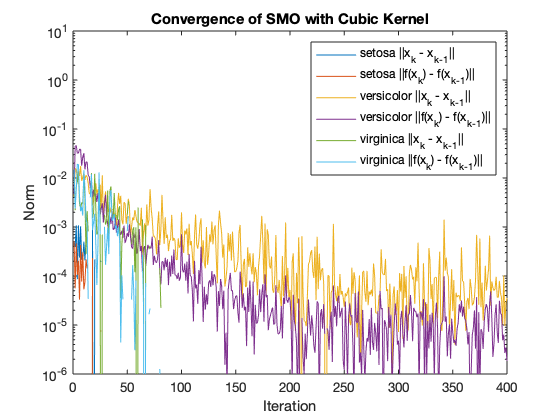

In [12]:
cubic_SMO_info = [];
for i = 1:length(classes)
    [alpha,b,info] = SMO(X,species,char(classes(i)),K_cubic,C_cubic,tolSMO,max_passes,maxIter,1);
    cubic_SMO_info = [cubic_SMO_info info];
end
for i = 1:length(classes)
    semilogy(cubic_SMO_info(i).xnorms); hold on;
    semilogy(cubic_SMO_info(i).fnorms); hold on;
end
legend_str = ["setosa ||x_k - x_{k-1}||";"setosa ||f(x_k) - f(x_{k-1})||";
              "versicolor ||x_k - x_{k-1}||";"versicolor ||f(x_k) - f(x_{k-1})||";
              "virginica ||x_k - x_{k-1}||";"virginica ||f(x_k) - f(x_{k-1})||"];
ylim([1e-6,10])
legend(legend_str,'Location','northeast')
xlabel('Iteration')
ylabel('Norm')
title('Convergence of SMO with Cubic Kernel')

Convergence of SMO with RBF Kernel

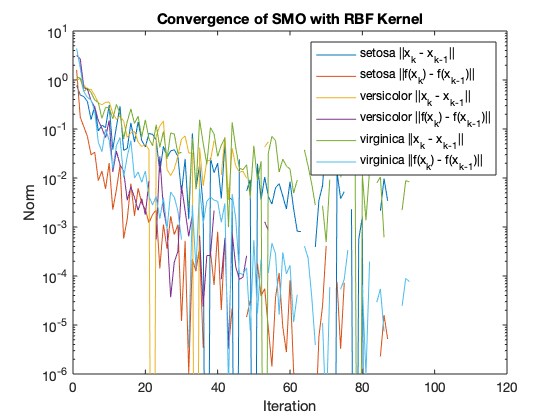

In [13]:
RBF_SMO_info = [];
for i = 1:length(classes)
    [alpha,b,info] = SMO(X,species,char(classes(i)),K_RBF,C_RBF,tolSMO,max_passes,maxIter,1);
    RBF_SMO_info = [RBF_SMO_info info];
end
for i = 1:length(classes)
    semilogy(RBF_SMO_info(i).xnorms); hold on;
    semilogy(RBF_SMO_info(i).fnorms); hold on;
end
legend_str = ["setosa ||x_k - x_{k-1}||";"setosa ||f(x_k) - f(x_{k-1})||";
              "versicolor ||x_k - x_{k-1}||";"versicolor ||f(x_k) - f(x_{k-1})||";
              "virginica ||x_k - x_{k-1}||";"virginica ||f(x_k) - f(x_{k-1})||"];
ylim([1e-6,10])
legend(legend_str,'Location','northeast')
xlabel('Iteration')
ylabel('Norm')
title('Convergence of SMO with RBF Kernel')

Accuracy Through Iterations of all Methods

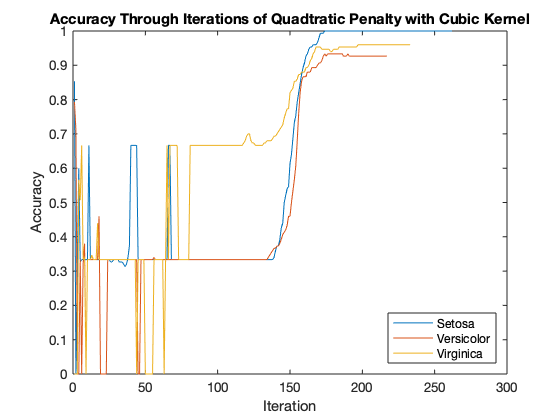

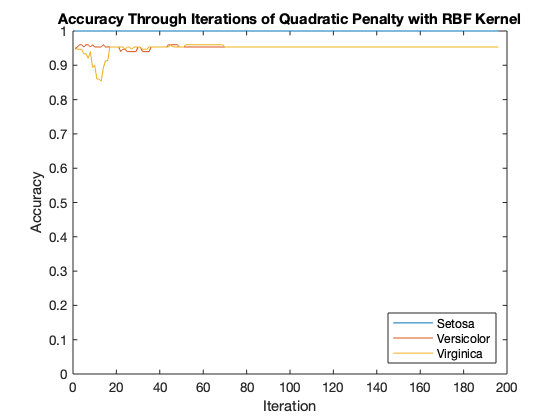

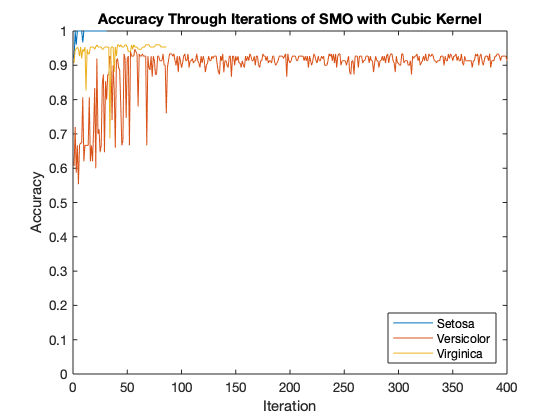

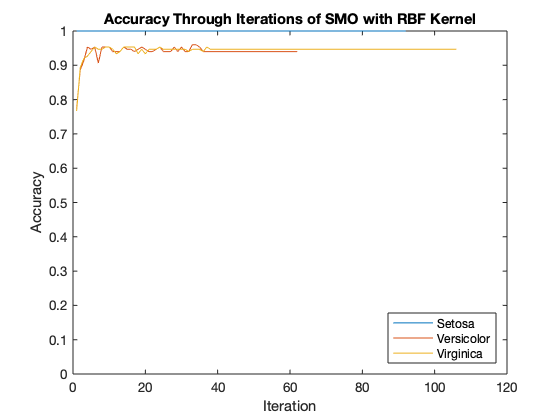

In [14]:
figure(1)
for i = 1:length(classes)
    plot(cubic_QP_info(i).accs); hold on;
end
title(['Accuracy Through Iterations of Quadtratic Penalty with Cubic Kernel'])
ylabel("Accuracy")
xlabel("Iteration")
legend(["Setosa";"Versicolor";"Virginica"],'Location','southeast')
ylim([0,1])
figure(2)
for i = 1:length(classes)
    plot(RBF_QP_info(i).accs); hold on;
end
title(['Accuracy Through Iterations of Quadratic Penalty with RBF Kernel'])
ylabel("Accuracy")
xlabel("Iteration")
legend(["Setosa";"Versicolor";"Virginica"],'Location','southeast')
ylim([0,1])
figure(3)
for i = 1:length(classes)
    plot(cubic_SMO_info(i).accs); hold on;
end
title(['Accuracy Through Iterations of SMO with Cubic Kernel'])
ylabel("Accuracy")
xlabel("Iteration")
legend(["Setosa";"Versicolor";"Virginica"],'Location','southeast')
ylim([0,1])
figure(4)
for i = 1:length(classes)
    plot(RBF_SMO_info(i).accs); hold on;
end
title(['Accuracy Through Iterations of SMO with RBF Kernel'])
ylabel("Accuracy")
xlabel("Iteration")
legend(["Setosa";"Versicolor";"Virginica"],'Location','southeast')
ylim([0,1])